In [4]:
import pandas as pd

from googleapiclient.discovery import build
from IPython.display import JSON

from config import YOUTUBE_API_KEY

In [2]:
import isodate
from dateutil import parser

from api_methods import collect_channel_stats, collect_video_ids, collect_video_details

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=YOUTUBE_API_KEY)

In [6]:
# Channels to analyze
channel_ids = [
    "UCYO_jab_esuFRV4b17AJtAw",
    # Can add more channels
]

In [7]:
channel_stats = collect_channel_stats(youtube, channel_ids)

In [8]:
channel_stats.head()

,channelName,subscribers,views,totalVideos,playlistId
0,3Blue1Brown,5770000,430024647,162,UUYO_jab_esuFRV4b17AJtAw


In [9]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "3Blue1Brown", "playlistId"].iloc[0]

In [10]:
video_ids = collect_video_ids(youtube, playlist_id)

In [11]:
len(video_ids)

162

In [12]:
video_df = collect_video_details(youtube, video_ids)

In [13]:
# Write to csv to experiment on data
video_df.to_csv('video_df.csv', index=False)

In [14]:
video_df = pd.read_csv('video_df.csv')

In [15]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,teYL0Er4c3g,3Blue1Brown,A beautiful international math olympiad problem,The link to the full video is at the bottom of...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-03T07:00:30Z,485156,29216,NaN,261,PT1M,hd,False
1,BTryyW7gqg4,3Blue1Brown,"Definition of a ""bit"", in information theory",A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-02T00:00:09Z,73355,5241,NaN,23,PT1M,hd,False
2,kpG7I2MOcnI,3Blue1Brown,The Newton art puzzle,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-29T19:00:32Z,1489602,93529,NaN,481,PT1M,hd,False
3,3KbiJ-z0j44,3Blue1Brown,What is a group?,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-27T19:00:01Z,86181,6065,NaN,72,PT1M,hd,False
4,R1e7aHBKLnM,3Blue1Brown,How to derive a formula for π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-25T19:00:15Z,167463,10526,NaN,95,PT1M,hd,False


In [16]:
# Check for NULL values
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [17]:
# Check data types
video_df.dtypes

video_id           object
channelTitle       object
title              object
description        object
tags               object
publishedAt        object
viewCount           int64
likeCount           int64
favouriteCount    float64
commentCount        int64
duration           object
definition         object
caption              bool
dtype: object

In [18]:
# Find published day
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))

In [19]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName
0,teYL0Er4c3g,3Blue1Brown,A beautiful international math olympiad problem,The link to the full video is at the bottom of...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-03 07:00:30+00:00,485156,29216,NaN,261,PT1M,hd,False,Wednesday
1,BTryyW7gqg4,3Blue1Brown,"Definition of a ""bit"", in information theory",A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-02 00:00:09+00:00,73355,5241,NaN,23,PT1M,hd,False,Tuesday
2,kpG7I2MOcnI,3Blue1Brown,The Newton art puzzle,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-29 19:00:32+00:00,1489602,93529,NaN,481,PT1M,hd,False,Friday
3,3KbiJ-z0j44,3Blue1Brown,What is a group?,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-27 19:00:01+00:00,86181,6065,NaN,72,PT1M,hd,False,Wednesday
4,R1e7aHBKLnM,3Blue1Brown,How to derive a formula for π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-25 19:00:15+00:00,167463,10526,NaN,95,PT1M,hd,False,Monday


In [20]:
# convert duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = pd.to_timedelta(video_df['durationSecs'])
video_df['durationSecs'] = video_df['durationSecs'].astype(str).map(lambda x: x[7:])

In [21]:
video_df[['durationSecs', 'duration']] 

,durationSecs,duration
0,00:01:00,PT1M
1,00:01:00,PT1M
2,00:01:00,PT1M
3,00:01:00,PT1M
4,00:01:00,PT1M
...,...,...
157,00:15:08,PT15M8S
158,00:07:27,PT7M27S
159,00:01:49,PT1M49S
160,00:01:04,PT1M4S


In [22]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs
0,teYL0Er4c3g,3Blue1Brown,A beautiful international math olympiad problem,The link to the full video is at the bottom of...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-03 07:00:30+00:00,485156,29216,NaN,261,PT1M,hd,False,Wednesday,00:01:00
1,BTryyW7gqg4,3Blue1Brown,"Definition of a ""bit"", in information theory",A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-02 00:00:09+00:00,73355,5241,NaN,23,PT1M,hd,False,Tuesday,00:01:00
2,kpG7I2MOcnI,3Blue1Brown,The Newton art puzzle,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-29 19:00:32+00:00,1489602,93529,NaN,481,PT1M,hd,False,Friday,00:01:00
3,3KbiJ-z0j44,3Blue1Brown,What is a group?,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-27 19:00:01+00:00,86181,6065,NaN,72,PT1M,hd,False,Wednesday,00:01:00
4,R1e7aHBKLnM,3Blue1Brown,How to derive a formula for π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-25 19:00:15+00:00,167463,10526,NaN,95,PT1M,hd,False,Monday,00:01:00


In [23]:
plt.rcParams["figure.figsize"] = (12,6)

d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


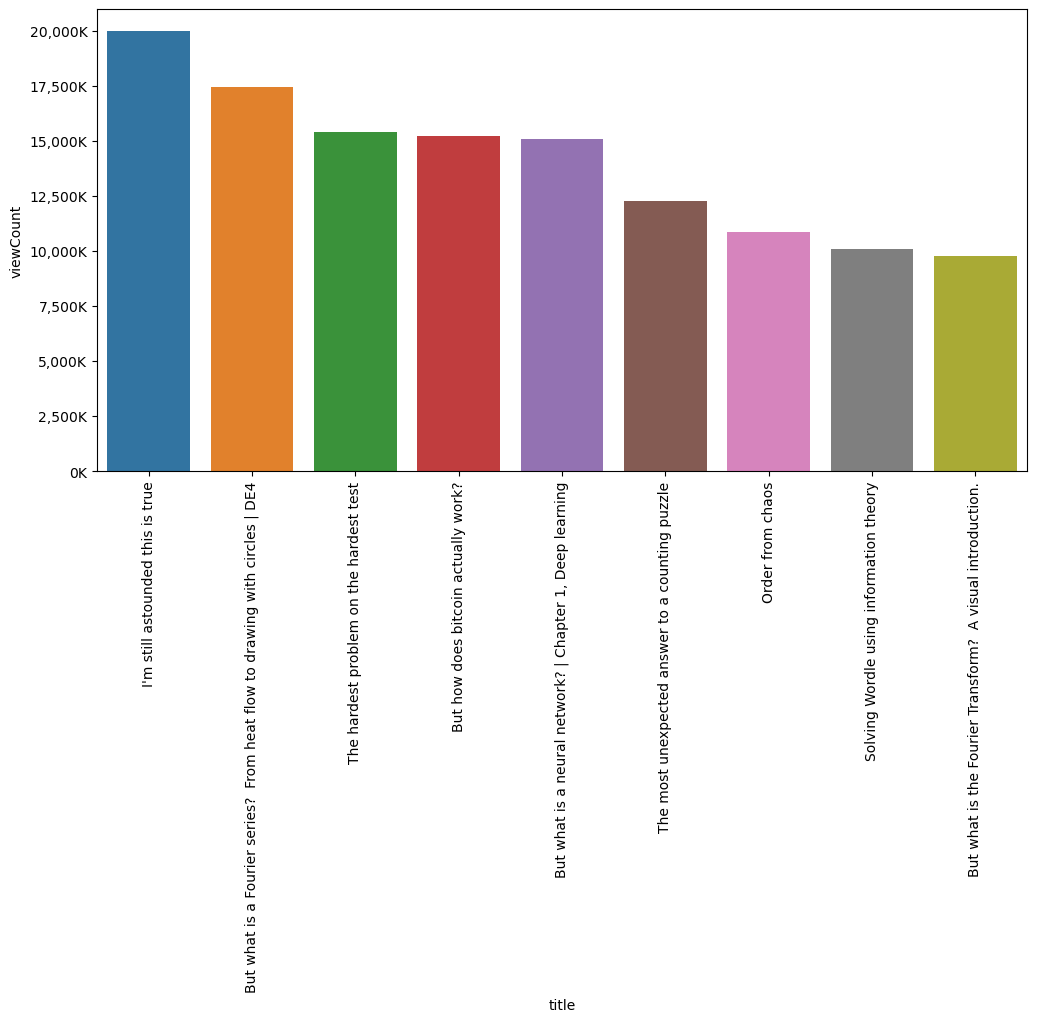

In [24]:

ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


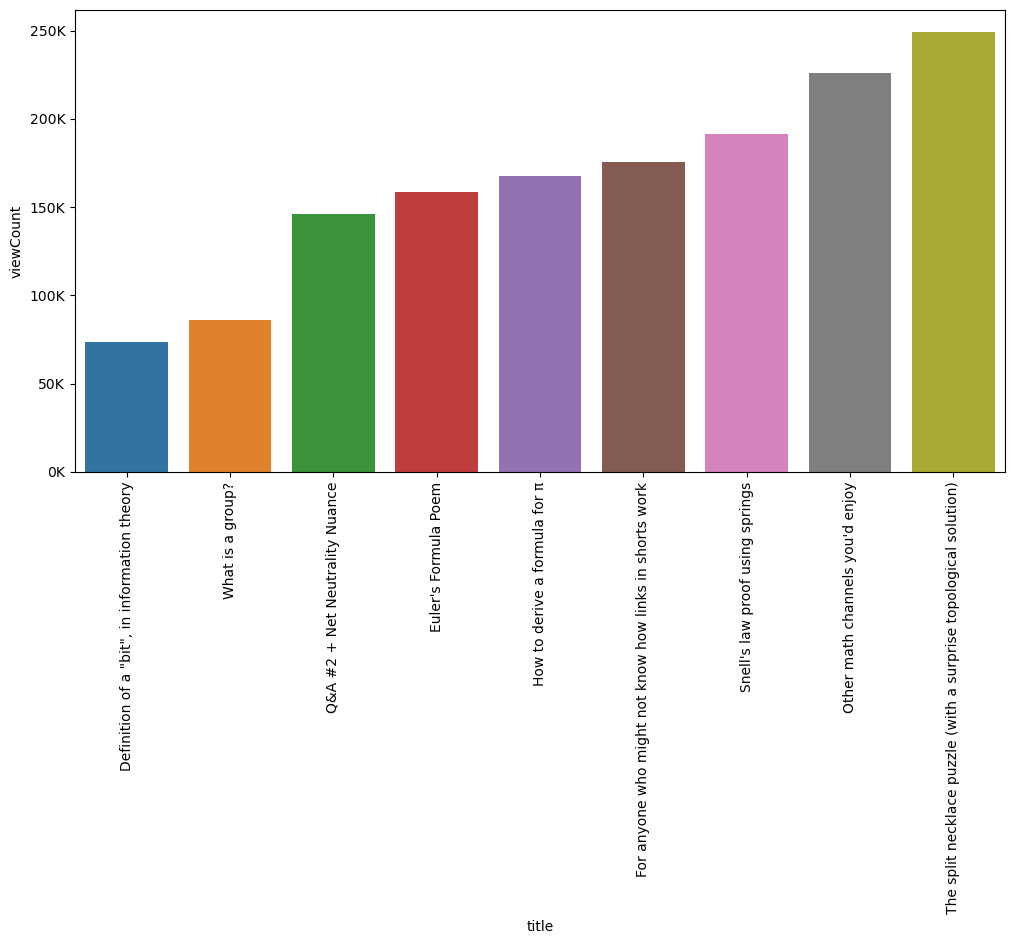

In [25]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<Axes: >

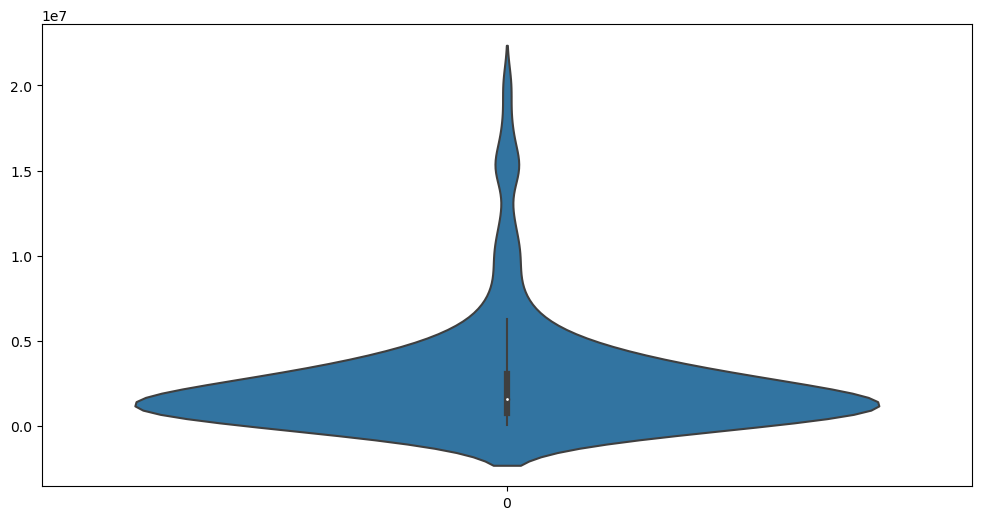

In [26]:
sns.violinplot(video_df['viewCount'])

d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='likeCount', ylabel='viewCount'>

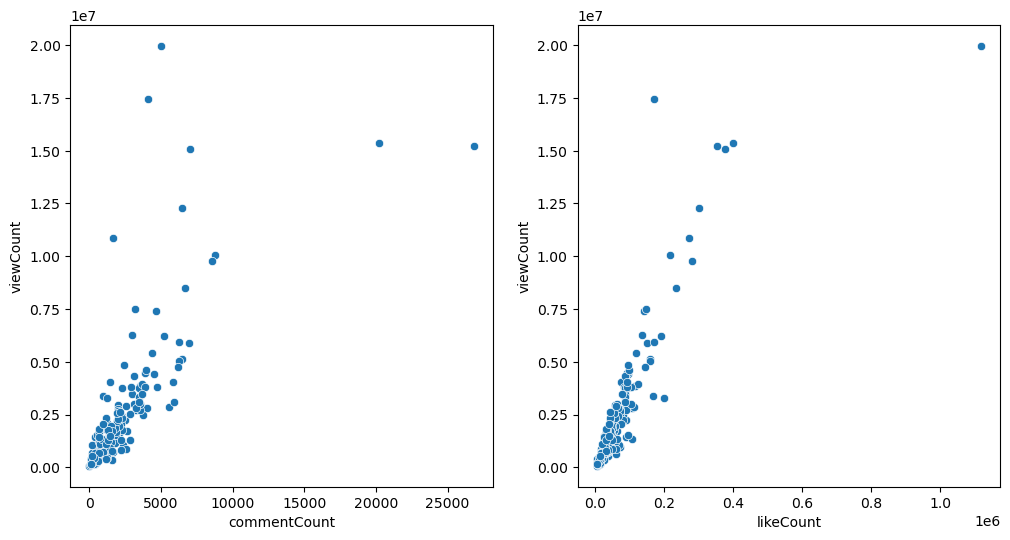

In [27]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y = 'viewCount', ax = ax[1])

d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Program\Miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='durationSecs', ylabel='Count'>

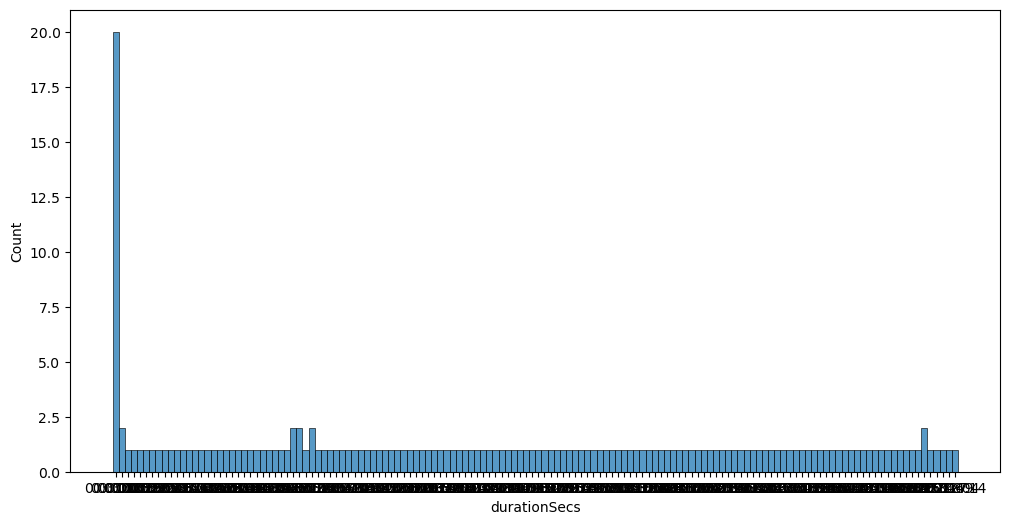

In [28]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

In [29]:

day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [30]:
day_df = day_df.reindex(weekdays)

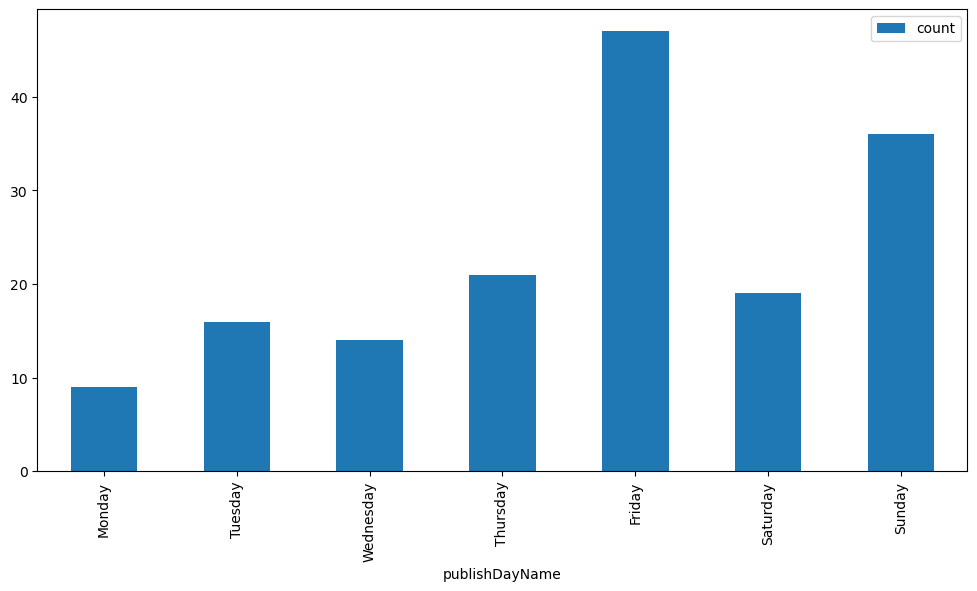

In [31]:
day_df.plot(kind="bar")
plt.show()

In [32]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs
0,teYL0Er4c3g,3Blue1Brown,A beautiful international math olympiad problem,The link to the full video is at the bottom of...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-03 07:00:30+00:00,485156,29216,NaN,261,PT1M,hd,False,Wednesday,00:01:00
1,BTryyW7gqg4,3Blue1Brown,"Definition of a ""bit"", in information theory",A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2024-01-02 00:00:09+00:00,73355,5241,NaN,23,PT1M,hd,False,Tuesday,00:01:00
2,kpG7I2MOcnI,3Blue1Brown,The Newton art puzzle,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-29 19:00:32+00:00,1489602,93529,NaN,481,PT1M,hd,False,Friday,00:01:00
3,3KbiJ-z0j44,3Blue1Brown,What is a group?,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-27 19:00:01+00:00,86181,6065,NaN,72,PT1M,hd,False,Wednesday,00:01:00
4,R1e7aHBKLnM,3Blue1Brown,How to derive a formula for π,A link to the full video is at the bottom of t...,"['Mathematics', 'three blue one brown', '3 blu...",2023-12-25 19:00:15+00:00,167463,10526,NaN,95,PT1M,hd,False,Monday,00:01:00
